# YouTube Title Category Classifier

In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Part 1: Import and clean data

### Import CSV with all country data

In [2]:
ALLvids = pd.read_csv("All_cnt_ctg.csv", header=0)
ALLvids.head(3)

,Unnamed: 0,channel_title,no_of_vids,trending_date,title,category_id,publish_time,views,likes,dislikes,comment_count,Category_name,Country
0,0,SET India,192,171411,Crime Patrol Dial 100 - क्राइम पेट्रोल - Ep 65...,24,2017-11-12T15:34:31.000Z,210478,905,176,85,Entertainment,CANADA
1,1,MSNBC,189,171411,Barnicle: World Leaders Are Laughing At The US...,25,2017-11-13T14:53:22.000Z,200264,2947,317,2321,News & Politics,CANADA
2,2,FBE,188,171411,YOUTUBERS REACT TO TOP 10 TWITTER ACCOUNTS OF ...,24,2017-11-12T22:00:01.000Z,960747,31810,668,5335,Entertainment,CANADA


### Create New Dataframe with only US, Great Britian, and Canada data

In [3]:
new_videos = ALLvids.loc[(ALLvids['Country'] == "U.S.A")|(ALLvids['Country'] == "GREAT BRITAIN")|(ALLvids['Country'] == "CANADA")]
            
new_videos.head(5)

,Unnamed: 0,channel_title,no_of_vids,trending_date,title,category_id,publish_time,views,likes,dislikes,comment_count,Category_name,Country
0,0,SET India,192,171411,Crime Patrol Dial 100 - क्राइम पेट्रोल - Ep 65...,24,2017-11-12T15:34:31.000Z,210478,905,176,85,Entertainment,CANADA
1,1,MSNBC,189,171411,Barnicle: World Leaders Are Laughing At The US...,25,2017-11-13T14:53:22.000Z,200264,2947,317,2321,News & Politics,CANADA
2,2,FBE,188,171411,YOUTUBERS REACT TO TOP 10 TWITTER ACCOUNTS OF ...,24,2017-11-12T22:00:01.000Z,960747,31810,668,5335,Entertainment,CANADA
3,3,The Young Turks,186,171411,The Alt-Right Is Crushing On Taylor Swift,25,2017-11-13T02:00:00.000Z,100394,1619,907,1595,News & Politics,CANADA
4,4,REACT,183,171411,DO COLLEGE KIDS KNOW 80s MUSIC? #8 (REACT: Do ...,24,2017-11-12T20:00:01.000Z,549374,16832,248,3579,Entertainment,CANADA


# Part 2: Train model using Naive Bayes
***

### Split 'Title' into a string of words using CountVectorizer:

In [4]:
vector = CountVectorizer()
counts = vector.fit_transform(new_videos['title'].values) #X

### Use the Naive Bayes model and target 'Category':

In [5]:
NB_Model = MultinomialNB()
targets = new_videos['category_id'].values #y
NB_Model.fit(counts,targets)

MultinomialNB()

### Check Accuracy using a 90/10 train/test split

In [6]:
X= counts
y= targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1)

NBtest = MultinomialNB().fit(X_train, y_train) #Fit to train data
nb_predictions = NBtest.predict(X_test) #Predict to test data
acc_nb = NBtest.score(X_test, y_test) #Score to test data
print('The Naive Bayes Algorithm scored an accuracy of', acc_nb)

The Naive Bayes Algorithm scored an accuracy of 0.468013468013468


# Part 3: Test model

### Enter hypothetical titles to predict the category for: 

In [7]:
Titles = ["Adorable cat plays with toy",
        "Fashion Trends for Fall 2018",
        "Olympics Opening Ceremony Highlights",
        "Warriors vs. Cavs Basketball Game",
        "Donald Trump on Fox News",
        "Car Crash Injures Two",
        "Ed Sheeran - Perfect (Official Music Video)",
        "how to do eyeshadow"
         ]

### Insert titles into model to make predictions:

In [8]:
Titles_counts = vector.transform(Titles)
Predict = NB_Model.predict(Titles_counts)
Predict

array([24, 24, 17, 17, 25, 24, 10, 24])

### Create Category Names Dictionary to iterate through, pairing model outputs with matching category name 

In [9]:
#Create Category Dictionary
CategoryNamesDict = {"Film & Animation": 1,"Autos & Vehicles": 2,"Music": 10,
                "Pets & Animals": 15,"Sports":17,"Short Movies":18,"Travel & Events":19,"Gaming":20,
                "Videoblogging":21, "People & Blogs":22,"Comedy":23,"Entertainment":24,"News & Politics":25,
                "Howto & Style":26,"Education":27, "Science & Technology":28,"Nonprofits & Activism":29,
                "Movies":30,"Anime/Animation":31,"Action/Adventure":32,"Classics":33,"Comedy":34,"Documentary":35,
                "Drama":36,"Family":37,"Foreign":38,"Horror":39,"Sci-Fi/Fantasy":40,"Thriller":41,"Shorts":42,
                "Shows":43,"Trailers":44
                }

In [10]:
#Use List Comprehension to make dictionary accessible by id/title
CategoryDict = [{'id': value, 'title': key} for key, value in CategoryNamesDict.items()]
CategoryDict

[{'id': 1, 'title': 'Film & Animation'},
 {'id': 2, 'title': 'Autos & Vehicles'},
 {'id': 10, 'title': 'Music'},
 {'id': 15, 'title': 'Pets & Animals'},
 {'id': 17, 'title': 'Sports'},
 {'id': 18, 'title': 'Short Movies'},
 {'id': 19, 'title': 'Travel & Events'},
 {'id': 20, 'title': 'Gaming'},
 {'id': 21, 'title': 'Videoblogging'},
 {'id': 22, 'title': 'People & Blogs'},
 {'id': 34, 'title': 'Comedy'},
 {'id': 24, 'title': 'Entertainment'},
 {'id': 25, 'title': 'News & Politics'},
 {'id': 26, 'title': 'Howto & Style'},
 {'id': 27, 'title': 'Education'},
 {'id': 28, 'title': 'Science & Technology'},
 {'id': 29, 'title': 'Nonprofits & Activism'},
 {'id': 30, 'title': 'Movies'},
 {'id': 31, 'title': 'Anime/Animation'},
 {'id': 32, 'title': 'Action/Adventure'},
 {'id': 33, 'title': 'Classics'},
 {'id': 35, 'title': 'Documentary'},
 {'id': 36, 'title': 'Drama'},
 {'id': 37, 'title': 'Family'},
 {'id': 38, 'title': 'Foreign'},
 {'id': 39, 'title': 'Horror'},
 {'id': 40, 'title': 'Sci-Fi/Fan

In [11]:
#Create For Loop
CategoryNamesList = []

for Category_ID in Predict:
    MatchingCategories = [x for x in CategoryDict if x["id"] == Category_ID]
    print(MatchingCategories)
    if MatchingCategories:
        CategoryNamesList.append(MatchingCategories[0]["title"])
        
CategoryNamesList

[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 17, 'title': 'Sports'}]
[{'id': 17, 'title': 'Sports'}]
[{'id': 25, 'title': 'News & Politics'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 10, 'title': 'Music'}]
[{'id': 24, 'title': 'Entertainment'}]


['Entertainment',
 'Entertainment',
 'Sports',
 'Sports',
 'News & Politics',
 'Entertainment',
 'Music',
 'Entertainment']

### Map values to the titles we want to predict:

In [12]:
TitleDataFrame = []
for i in range(0, len(Titles)):
    TitleToCategories = {'Title': Titles[i],  'Category': CategoryNamesList[i]}
    TitleDataFrame.append(TitleToCategories)

### Convert the resulting Dict to a Data Frame:

In [13]:
PredictDF = pd.DataFrame(Predict)
TitleDF = pd.DataFrame(TitleDataFrame)
PreFinalDF = pd.concat([PredictDF, TitleDF], axis=1)
PreFinalDF.columns = (['Categ_ID', 'Hypothetical Video Title', 'Predicted Category'])
FinalDF = PreFinalDF.drop(['Categ_ID'],axis=1)
cols = FinalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
FinalDF= FinalDF[cols]

# View Final Prediction Results:

In [14]:
FinalDF

,Predicted Category,Hypothetical Video Title
0,Entertainment,Adorable cat plays with toy
1,Entertainment,Fashion Trends for Fall 2018
2,Sports,Olympics Opening Ceremony Highlights
3,Sports,Warriors vs. Cavs Basketball Game
4,News & Politics,Donald Trump on Fox News
5,Entertainment,Car Crash Injures Two
6,Music,Ed Sheeran - Perfect (Official Music Video)
7,Entertainment,how to do eyeshadow


## Test Model: More Title Examples/Model Testing

### Titles2: Enter hypothetical titles to test

In [15]:
Titles2 = ["Joe Biden gives White House Speech",
        "How to dye your hair blonde",
        "Best SuperBowl Touchdowns",
        "10 Reasons Logan Paul Sucks",
        "How to jump start your car",
        "5 Reasons Aliens Are Real",
        "Great Hotels in Italy",
        "Kim Kardashian and Kanye West Divorce",
        "Machine Learning Tutorial",
        "Donald Trump Speaks at CPAC",
        "Nomadland Official Trailer",
        "BEST Hockey GOALS of ALL TIME!"
         ]

### Insert titles into model to make predictions:

In [16]:
Titles_counts2 = vector.transform(Titles2)
Predict = NB_Model.predict(Titles_counts2)
Predict

array([24, 24, 24, 24, 22, 24, 24, 24, 22, 25, 24, 24])

### Match category predictions with corresponding titles and append to list

In [17]:
CategoryNamesList2 = []

for Category_ID in Predict:
    MatchingCategories = [x for x in CategoryDict if x["id"] == Category_ID]
    print(MatchingCategories)
    if MatchingCategories:
        CategoryNamesList2.append(MatchingCategories[0]["title"])
        
CategoryNamesList2

[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 22, 'title': 'People & Blogs'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 22, 'title': 'People & Blogs'}]
[{'id': 25, 'title': 'News & Politics'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]


['Entertainment',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'People & Blogs',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'People & Blogs',
 'News & Politics',
 'Entertainment',
 'Entertainment']

### Map values to the titles we want to predict

In [18]:
TitleDataFrame = []
for i in range(0, len(Titles2)):
    TitleToCategories = {'Title': Titles2[i],  'Category': CategoryNamesList2[i]}
    TitleDataFrame.append(TitleToCategories)

### Convert predictions and titles into DataFrame

In [19]:
PredictDF = pd.DataFrame(Predict)
TitleDF = pd.DataFrame(TitleDataFrame)
PreFinalDF = pd.concat([PredictDF, TitleDF], axis=1)
PreFinalDF.columns = (['Categ_ID', 'Hypothetical Video Title', 'Predicted Category'])
FinalDF = PreFinalDF.drop(['Categ_ID'],axis=1)
cols = FinalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
FinalDF= FinalDF[cols]

## View Predictions for Titles2

In [20]:
#Second Titles DF
FinalDF

,Predicted Category,Hypothetical Video Title
0,Entertainment,Joe Biden gives White House Speech
1,Entertainment,How to dye your hair blonde
2,Entertainment,Best SuperBowl Touchdowns
3,Entertainment,10 Reasons Logan Paul Sucks
4,People & Blogs,How to jump start your car
5,Entertainment,5 Reasons Aliens Are Real
6,Entertainment,Great Hotels in Italy
7,Entertainment,Kim Kardashian and Kanye West Divorce
8,People & Blogs,Machine Learning Tutorial
9,News & Politics,Donald Trump Speaks at CPAC


## Titles3

In [21]:
Titles3 = ["Donald Trump gives White House Speech",
        "Ed Sheeran- Best Hits",
        "Basketball Highlights Warriors",
        "10 Places to Travel for your next Vacation",
        "How to put on makeup",
        "Why Science is cool",
        "Jake Paul Worst Songs",
        "Ariana Grande Thank You Next",
        "Car Tutorial",
        "Donald Trump Speaks at CPAC",
        "Drake - God’s Plan",
        "Roy Moore Speech"
         ]

In [22]:
Titles_counts3 = vector.transform(Titles3)
Predict = NB_Model.predict(Titles_counts3)
Predict

array([25, 10, 17, 24, 24, 24, 22, 24, 24, 25, 10, 25])

In [23]:
CategoryNamesList3 = []

for Category_ID in Predict:
    MatchingCategories = [x for x in CategoryDict if x["id"] == Category_ID]
    print(MatchingCategories)
    if MatchingCategories:
        CategoryNamesList3.append(MatchingCategories[0]["title"])
        
CategoryNamesList3

[{'id': 25, 'title': 'News & Politics'}]
[{'id': 10, 'title': 'Music'}]
[{'id': 17, 'title': 'Sports'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 22, 'title': 'People & Blogs'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 24, 'title': 'Entertainment'}]
[{'id': 25, 'title': 'News & Politics'}]
[{'id': 10, 'title': 'Music'}]
[{'id': 25, 'title': 'News & Politics'}]


['News & Politics',
 'Music',
 'Sports',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'People & Blogs',
 'Entertainment',
 'Entertainment',
 'News & Politics',
 'Music',
 'News & Politics']

In [24]:
TitleDataFrame = []
for i in range(0, len(Titles3)):
    TitleToCategories = {'Title': Titles3[i],  'Category': CategoryNamesList3[i]}
    TitleDataFrame.append(TitleToCategories)

In [25]:
PredictDF = pd.DataFrame(Predict)
TitleDF = pd.DataFrame(TitleDataFrame)
PreFinalDF = pd.concat([PredictDF, TitleDF], axis=1)
PreFinalDF.columns = (['Categ_ID', 'Hypothetical Video Title', 'Predicted Category'])
FinalDF = PreFinalDF.drop(['Categ_ID'],axis=1)
cols = FinalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
FinalDF= FinalDF[cols]

## Predictions for Titles3

In [26]:
FinalDF

,Predicted Category,Hypothetical Video Title
0,News & Politics,Donald Trump gives White House Speech
1,Music,Ed Sheeran- Best Hits
2,Sports,Basketball Highlights Warriors
3,Entertainment,10 Places to Travel for your next Vacation
4,Entertainment,How to put on makeup
5,Entertainment,Why Science is cool
6,People & Blogs,Jake Paul Worst Songs
7,Entertainment,Ariana Grande Thank You Next
8,Entertainment,Car Tutorial
9,News & Politics,Donald Trump Speaks at CPAC


In [27]:
# Save Model and Vector using joblib
import joblib
#Save NB Model
filename = "NBClassifierModel.sav"
joblib.dump(NB_Model, filename)

['NBClassifierModel.sav']

In [28]:
#Save Vector
filename2 = "VectorNB.sav"
joblib.dump(vector, filename2)

['VectorNB.sav']

## Word Cloud

In [39]:
# Import dependencies
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

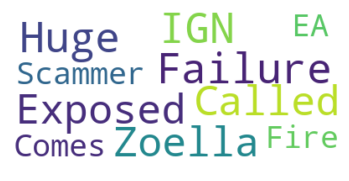

In [50]:
# Start with one review:
text = new_videos.title[10]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [51]:
text = " ".join(x for x in new_videos.title)
print ("There are {} words in the combination of all titles.".format(len(text)))

There are 470764 words in the combination of all titles.


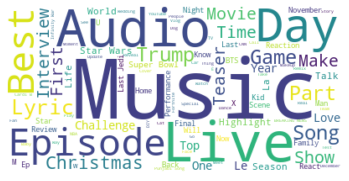

In [60]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["the", "a", "of", "official", "video", "v", "Full", "new", "VS", "ft", "HD", "New", 
                  "Trailer", "feat", "S", "de"])

# Generate a word cloud image for 100 title words
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save figure (Change image name if generating new word cloud!)
plt.savefig('WordCloud1.png')

# Show
plt.show()

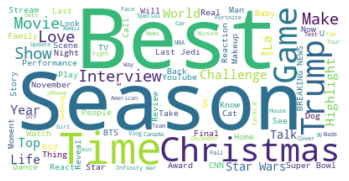

In [63]:
# World Cloud 2: Removing Music, Live, Episode, Day, Audio, Song, Teaser, First, Lyric, One, Le, M, Ep, X, Part
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["the", "a", "of", "official", "video", "v", "Full", "new", "VS", "ft", "HD", "New", 
                  "Trailer", "feat", "S", "de", "Music", "Live", "Episode", "Day", "Audio", "Song",
                 "Teaser", "First", "Lyric", "One", "Le", "M", "Ep", "X", "Part"])

# Generate a word cloud image for 100 title words
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save figure (Change image name if generating new word cloud!)
plt.savefig('WordCloud2.png')

# Show
plt.show()